In [1]:
# SHAP

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import shap
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.utils import class_weight, resample
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

#preview head and tail
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
#Preprocessing Data -> Remove na/null value
data.dropna(axis=0, inplace=True)
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [8]:
#Remove Unnercesarry Col (ID)
data = data.drop(['id'], axis=1)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [9]:
#Transpose column gender, etc
data = pd.get_dummies(data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)
data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,True,False,True,False,True,False,False,True,True,False,False
2,80.0,0,1,105.92,32.5,1,True,False,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.4,1,False,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.0,1,False,False,True,False,False,True,False,False,False,True,False
5,81.0,0,0,186.21,29.0,1,True,False,True,False,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0,False,False,False,False,False,False,True,False,False,False,False
5106,81.0,0,0,125.20,40.0,0,False,False,True,False,False,True,False,True,False,True,False
5107,35.0,0,0,82.99,30.6,0,False,False,True,False,False,True,False,False,False,True,False
5108,51.0,0,0,166.29,25.6,0,True,False,True,False,True,False,False,False,True,False,False


In [10]:
numerical_columns= data.select_dtypes(['int','float','bool'])
numerical_columns

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,True,False,True,False,True,False,False,True,True,False,False
2,80.0,0,1,105.92,32.5,1,True,False,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.4,1,False,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.0,1,False,False,True,False,False,True,False,False,False,True,False
5,81.0,0,0,186.21,29.0,1,True,False,True,False,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0,False,False,False,False,False,False,True,False,False,False,False
5106,81.0,0,0,125.20,40.0,0,False,False,True,False,False,True,False,True,False,True,False
5107,35.0,0,0,82.99,30.6,0,False,False,True,False,False,True,False,False,False,True,False
5108,51.0,0,0,166.29,25.6,0,True,False,True,False,True,False,False,False,True,False,False


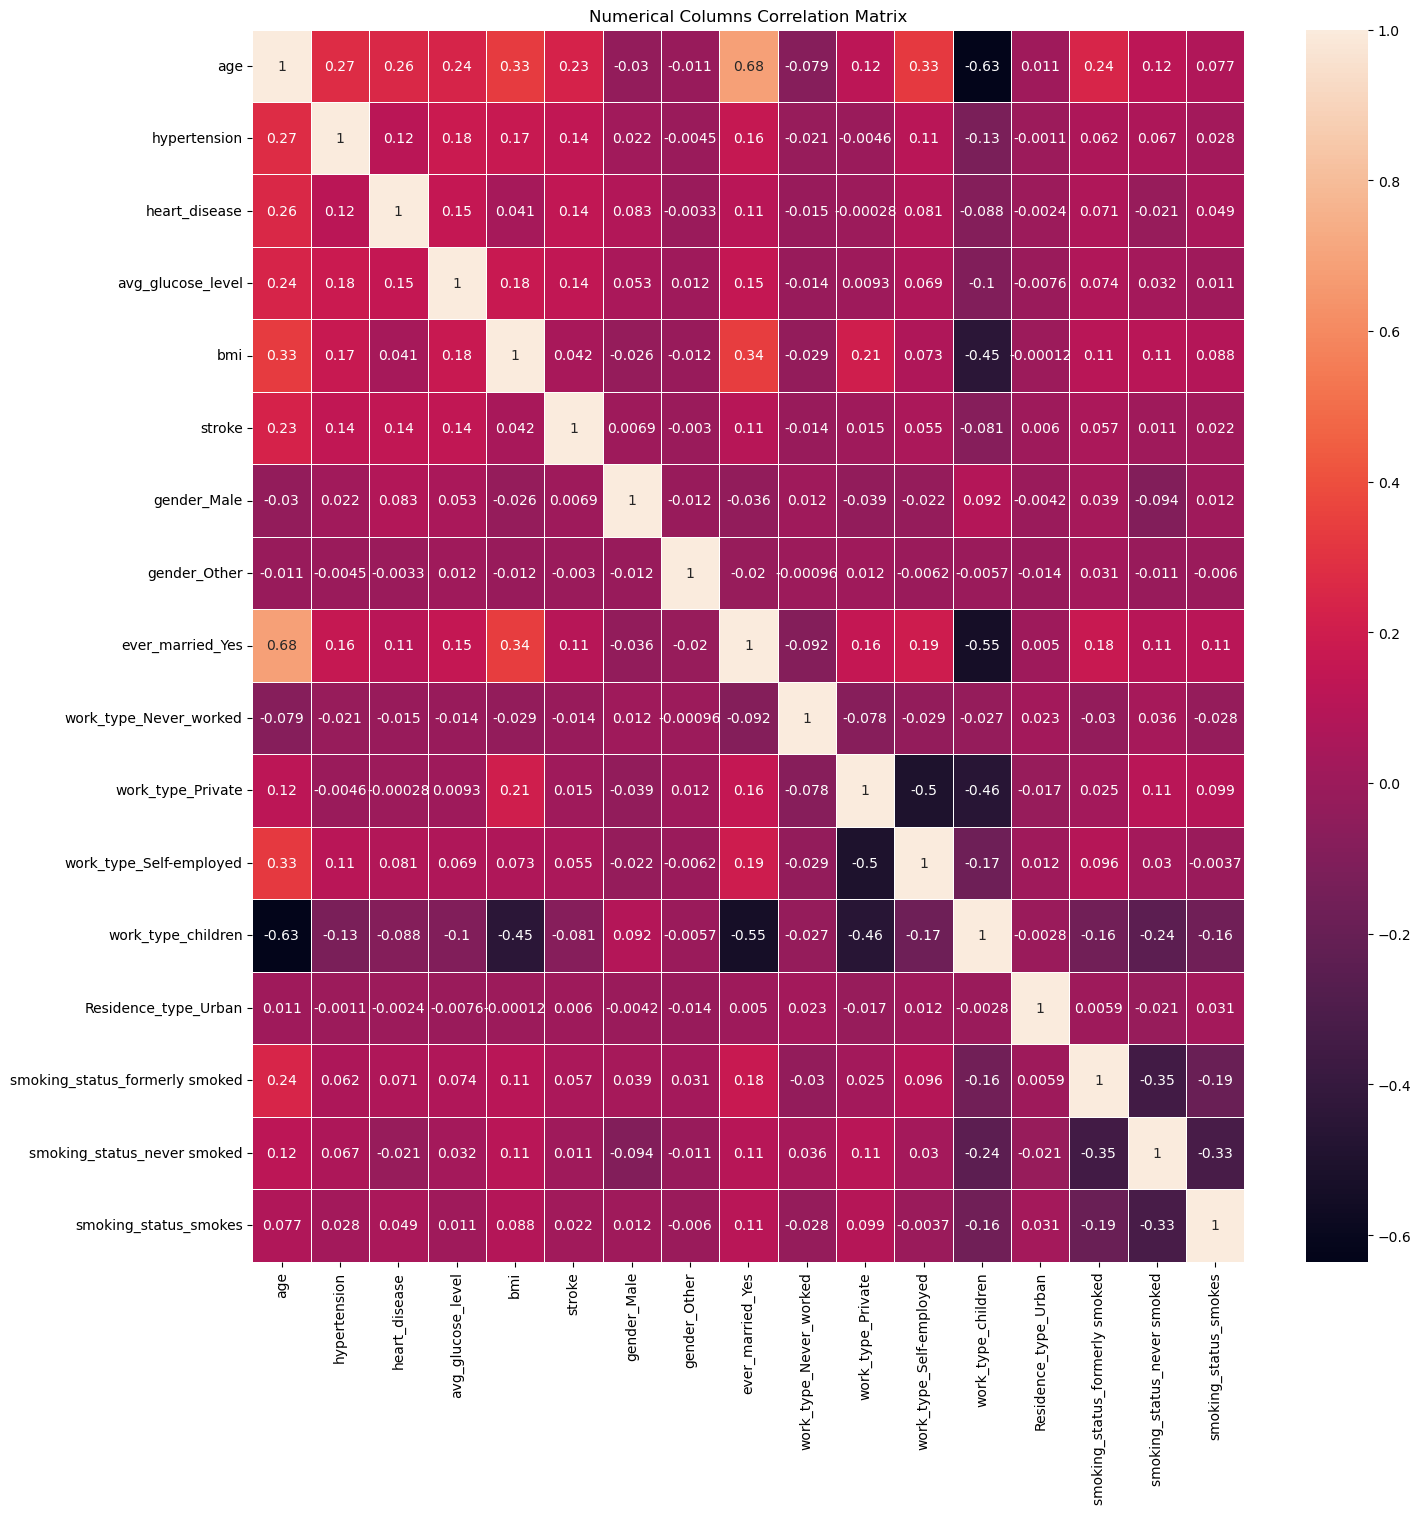

In [11]:
corr_matrix = numerical_columns.corr()

plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5)
plt.title('Numerical Columns Correlation Matrix')
plt.show()

In [12]:
#Cari data yang berkorelasi dengan stroke / prediksi stroke
corr_matrix = data.corr(numeric_only=True)
corr_with_stroke = corr_matrix['stroke'].drop('stroke')
print(corr_with_stroke.sort_values(ascending=False))

age                               0.232331
hypertension                      0.142515
avg_glucose_level                 0.138936
heart_disease                     0.137938
ever_married_Yes                  0.105089
smoking_status_formerly smoked    0.057320
work_type_Self-employed           0.055356
bmi                               0.042374
smoking_status_smokes             0.021530
work_type_Private                 0.014934
smoking_status_never smoked       0.010723
gender_Male                       0.006939
Residence_type_Urban              0.006031
gender_Other                     -0.003010
work_type_Never_worked           -0.014149
work_type_children               -0.080971
Name: stroke, dtype: float64


In [13]:
selected_columns = [
    'age',
    'hypertension',
    'avg_glucose_level',
    'heart_disease',
    'ever_married_Yes',
    'smoking_status_formerly smoked',
    'work_type_Self-employed',
    'bmi',
    'smoking_status_smokes',
    'work_type_Private',
    'smoking_status_never smoked',
    'gender_Male',
    'Residence_type_Urban',
    'stroke'  # target kolom tetap disertakan
]

numerical_columns = data[selected_columns]

In [14]:
numerical_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4909 non-null   float64
 1   hypertension                    4909 non-null   int64  
 2   avg_glucose_level               4909 non-null   float64
 3   heart_disease                   4909 non-null   int64  
 4   ever_married_Yes                4909 non-null   bool   
 5   smoking_status_formerly smoked  4909 non-null   bool   
 6   work_type_Self-employed         4909 non-null   bool   
 7   bmi                             4909 non-null   float64
 8   smoking_status_smokes           4909 non-null   bool   
 9   work_type_Private               4909 non-null   bool   
 10  smoking_status_never smoked     4909 non-null   bool   
 11  gender_Male                     4909 non-null   bool   
 12  Residence_type_Urban            4909 no

In [15]:
X = numerical_columns.drop(columns=['stroke'])
y = data['stroke']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=42)

In [17]:
# Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
smote = SMOTE(random_state=300)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [19]:
lr_model = LogisticRegression()
lr_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [20]:
lr_model.score(X_test_scaled, y_test)

0.7400581959262852

In [21]:
y_pred= lr_model.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.74      0.84       975
           1       0.15      0.79      0.25        56

    accuracy                           0.74      1031
   macro avg       0.57      0.76      0.55      1031
weighted avg       0.94      0.74      0.81      1031



In [22]:
explainer = shap.Explainer(lr_model, X_train_resampled)
shap_values = explainer(X_test_scaled)

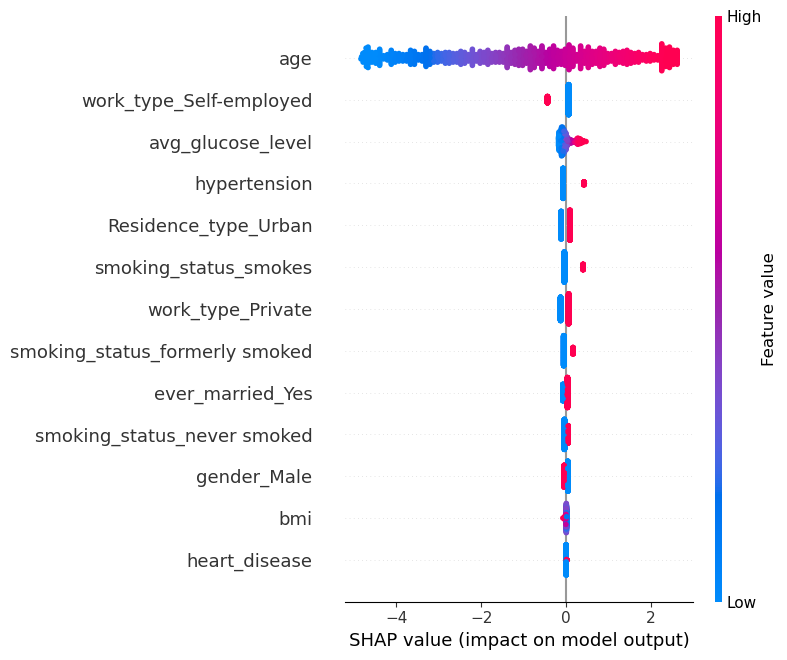

In [23]:
plt.figure(figsize=(4, 3))
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)

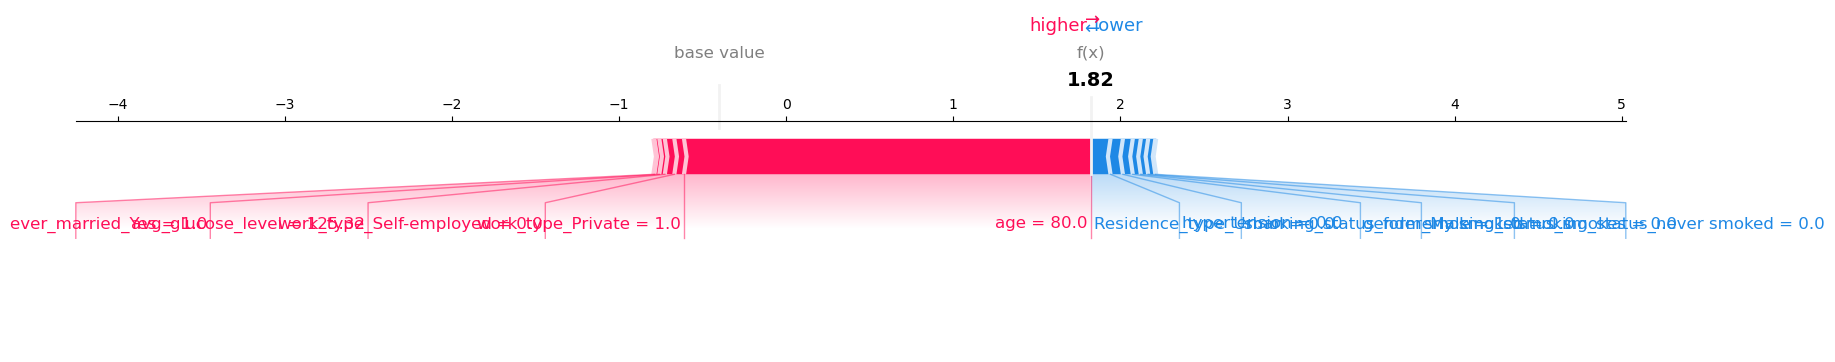

In [31]:
sample_idx = 0
shap.force_plot(explainer.expected_value, shap_values.values[sample_idx,:], 
                X_test.iloc[sample_idx,:], feature_names=X.columns, matplotlib=True)

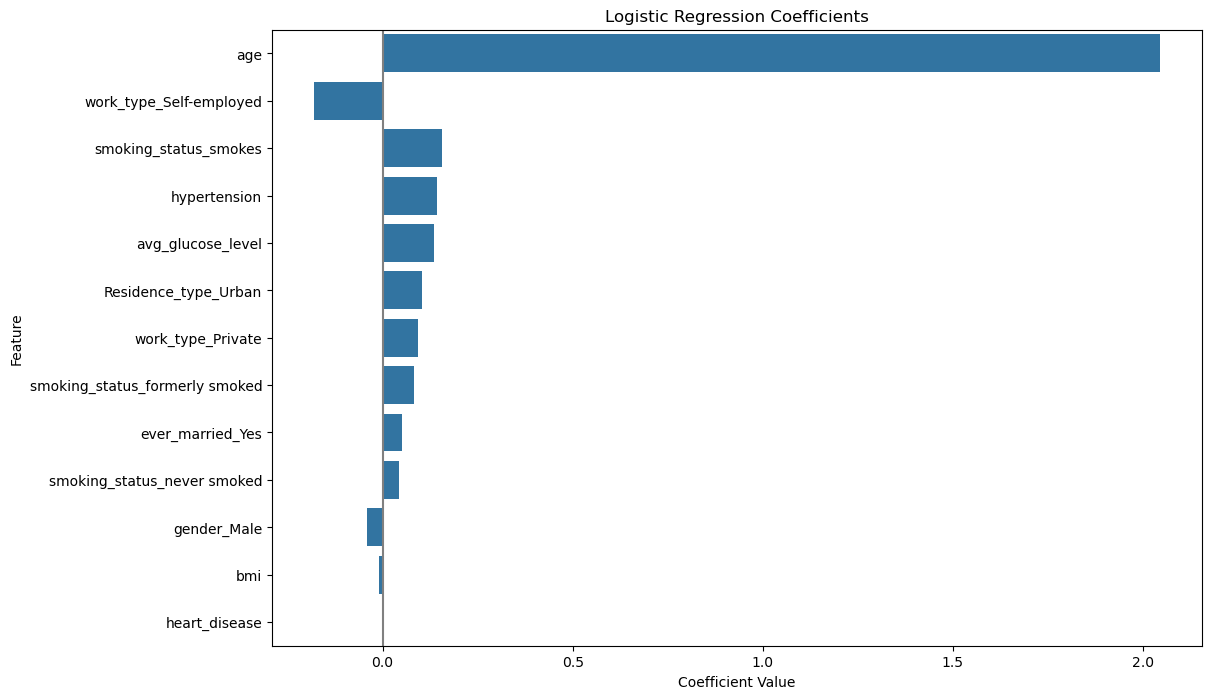


Model Coefficients Analysis:
                           Feature  Coefficient  Absolute_Coefficient  \
0                              age     2.043985              2.043985   
6          work_type_Self-employed    -0.179735              0.179735   
8            smoking_status_smokes     0.157212              0.157212   
1                     hypertension     0.142696              0.142696   
2                avg_glucose_level     0.135170              0.135170   
12            Residence_type_Urban     0.103556              0.103556   
9                work_type_Private     0.093878              0.093878   
5   smoking_status_formerly smoked     0.082242              0.082242   
4                 ever_married_Yes     0.050761              0.050761   
10     smoking_status_never smoked     0.042584              0.042584   
11                     gender_Male    -0.041893              0.041893   
7                              bmi    -0.008971              0.008971   
3                    

In [33]:
# Get feature coefficients and create a DataFrame
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_[0],
    'Absolute_Coefficient': np.abs(lr_model.coef_[0]),
    'Odds_Ratio': np.exp(lr_model.coef_[0])
})

# Sort by absolute coefficient value
coefficients = coefficients.sort_values('Absolute_Coefficient', ascending=False)

# Plot the coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(x=0, color='.5')
plt.show()

# Display the coefficients table
print("\nModel Coefficients Analysis:")
print(coefficients)

<Figure size 400x300 with 0 Axes>

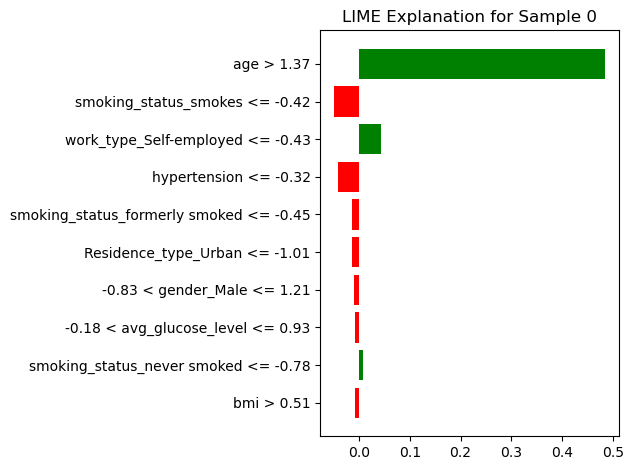

In [35]:
import lime
import lime.lime_tabular

# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_resampled, 
    feature_names=X.columns,
    class_names=['No Stroke', 'Stroke'],
    mode='classification',
    discretize_continuous=True
)

# Explain a specific instance (let's use the first test sample)
sample_idx = 0
exp = explainer.explain_instance(X_test_scaled[sample_idx], lr_model.predict_proba, num_features=10)

# Plot the explanation
plt.figure(figsize=(4, 3))
exp.as_pyplot_figure()
plt.title(f"LIME Explanation for Sample {sample_idx}")
plt.tight_layout()
plt.show()

# Show in notebook
exp.show_in_notebook(show_table=True)